<a href="https://colab.research.google.com/github/TanyaAgrwal/Machine-learning/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
data_path='/content/drive/MyDrive/dataset_facemask'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
labels_dict=dict(zip(categories,labels))

print(categories)
print(labels)
print(labels_dict)

['without_mask', 'with_mask']
[0, 1]
{'without_mask': 0, 'with_mask': 1}


In [ ]:
import cv2
width=100
height=100
data=[]
target=[]
for category in categories:
    cat_path=os.path.join(data_path,category)
    img_path=os.listdir(cat_path)
    
    for img in img_path:
        main_img=os.path.join(cat_path,img)
        my_img=cv2.imread(main_img)
        
        try:
            #gray_img=cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(my_img, (width,height))
            data.append(resized)
            target.append(labels_dict[category])
            
        except Exception as e:
            print("exception: ",e)

In [ ]:
import numpy as np
new_data=np.array(data)/255.0
#new_data=new_data.reshape(new_data.shape[0],new_data.shape[1],new_data.shape[2],1)
target=np.array(target)

In [ ]:
new_data.shape

(3868, 100, 100, 3)

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), padding='valid'))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), padding='valid'))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       7

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_data,target, test_size=0.1 ,stratify=target)

In [ ]:
X_train.shape, X_test.shape

((3481, 100, 100, 3), (387, 100, 100, 3))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, batch_size=20 ,epochs=8, validation_data=(X_test,y_test))

Epoch 1/8
175/175 [==============================] - 93s 524ms/step - loss: 0.3736 - accuracy: 0.8560 - val_loss: 0.9288 - val_accuracy: 0.7158
Epoch 2/8
175/175 [==============================] - 91s 522ms/step - loss: 0.1482 - accuracy: 0.9424 - val_loss: 0.2553 - val_accuracy: 0.8941
Epoch 3/8
175/175 [==============================] - 90s 517ms/step - loss: 0.1009 - accuracy: 0.9622 - val_loss: 0.1002 - val_accuracy: 0.9612
Epoch 4/8
175/175 [==============================] - 89s 510ms/step - loss: 0.0940 - accuracy: 0.9631 - val_loss: 0.0837 - val_accuracy: 0.9690
Epoch 5/8
175/175 [==============================] - 89s 507ms/step - loss: 0.0641 - accuracy: 0.9757 - val_loss: 0.1121 - val_accuracy: 0.9690
Epoch 6/8
175/175 [==============================] - 88s 505ms/step - loss: 0.0473 - accuracy: 0.9842 - val_loss: 0.1537 - val_accuracy: 0.9561
Epoch 7/8
175/175 [==============================] - 89s 509ms/step - loss: 0.0549 - accuracy: 0.9791 - val_loss: 0.0915 - val_accuracy:

In [ ]:
testloss, test_accuracy=model.evaluate(X_test,y_test)
print(testloss, test_accuracy)

13/13 [==============================] - 2s 179ms/step - loss: 0.0801 - accuracy: 0.9819
0.08010587096214294 0.9819121360778809


In [ ]:
history.history

{'accuracy': [0.9051996469497681,
  0.9500143527984619,
  0.9589198231697083,
  0.967538058757782,
  0.9767308235168457,
  0.9773053526878357,
  0.9773053526878357,
  0.9885090589523315],
 'loss': [0.25073859095573425,
  0.1437932401895523,
  0.10612958669662476,
  0.08581526577472687,
  0.06361842155456543,
  0.0628979429602623,
  0.06251956522464752,
  0.03703322261571884],
 'val_accuracy': [0.7157622575759888,
  0.8940568566322327,
  0.961240291595459,
  0.9689922332763672,
  0.9689922332763672,
  0.9560723304748535,
  0.9819121360778809,
  0.9819121360778809],
 'val_loss': [0.9288088083267212,
  0.2553372085094452,
  0.1001518964767456,
  0.08373052626848221,
  0.11205844581127167,
  0.1536904275417328,
  0.0915364995598793,
  0.08010588586330414]}

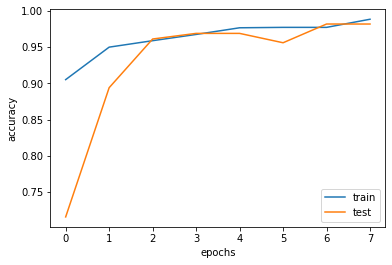

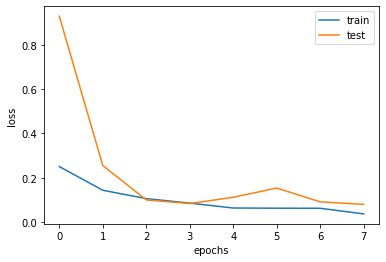

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 0_0_liudehua_0004.jpg to 0_0_liudehua_0004.jpg
User uploaded file "0_0_liudehua_0004.jpg" with length 8288 bytes


without mask


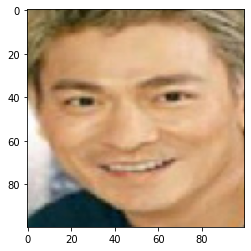

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.preprocessing import image
imag=image.load_img('/content/0_0_liudehua_0004.jpg', target_size=(100,100))
imag=image.img_to_array(imag)
imag=imag/255.0
plt.imshow(imag)
imag=imag.reshape(1,imag.shape[0], imag.shape[1],3)
y_pred=model.predict_classes(imag)
if(y_pred[0][0]==1):
  print("with mask")
else:
  print("without mask")

In [ ]:
face_cascade=cv2.CascadeClassifier('/content/drive/MyDrive/xyz.xml')
labelling_dict={0:'Without Mask', 1:'Mask'}
color_dict={0:[0,0,255],1:[0,255,0]}

In [ ]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
filename = take_photo()

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


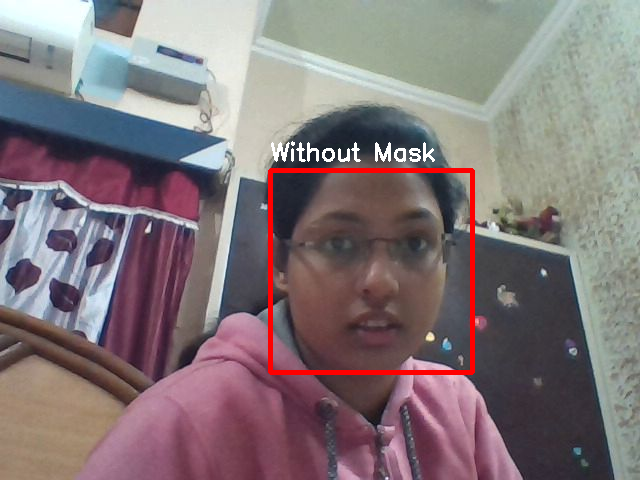

In [ ]:
image = cv2.imread(filename)
faces=face_cascade.detectMultiScale(image,1.3,5)

for x,y,w,h in faces:
    resizing=cv2.resize(image, (100,100))
    normalized=resizing/255.0
    reshaped=np.reshape(normalized,(1,100,100,3))
    result=model.predict_classes(reshaped)

    result=result[0][0]

    cv2.rectangle(image, (x,y), (x+w,y+h), color_dict[result],3)
    cv2.putText(image,labelling_dict[result], (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255),2)

'''print("resizing",resizing)
  print("normaized",normalized)
  print("reshaped",reshaped)
  print("result",result)'''
cv2_imshow(image)
'''key=cv2.waitKey(1)
  if key==ord('q'):
    break'''

cv2.destroyAllWindows()